# Health Index
### Code & Cry

We will be creating a **Health Index** with the following five indicators: (1) _Poverty_, (2) _Asthma_, (3) _Pollution Burden_, (4) _Low Birth Weight_, and (5) _Cardiovascular disease_. Since all the health and environmental indicators use different measures, an index will allow us to create a base measure and make the indicators comparable to one another. Thankfully, Cal Enviro Screen has provided the percentiles of each indicator, which makes the weighted level of each indicator comparable to one another. We will sum the percentiles of the five indicators for each FIPS code to define the overarching Health Index, making a total of 500 possible points. 
Higher scores indicate higher health and environmental vulnerabilities, whereas lower scores indicate lower vulnerabilities. 

We will then be merging this data with the neighborhood shapefile to visually map where higher vulnerabilities are compared to lower vulnerability neighborhoods. We expect to see higher vulnerability in the Bayview Hunters Point area, which may possibly be explained by the area's redlining history and land use zoning. 


In [1]:
# first, import necesssary libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import folium

In [2]:
# import dataframe for health index
health=pd.read_csv('data/sf_healthindex.csv')

In [3]:
# confirm that the data has been imported successfully
health.head()

FIPS  Pollution_Burden_Pctl  Asthma_Pctl  Low_Birth_Weight_Pctl  \
0  6075023200                  88.31        96.44                  96.82   
1  6075017902                  88.51        94.28                  98.20   
2  6075023103                  81.89        96.44                  95.32   
3  6075023001                  81.12        96.44                  82.28   
4  6075023400                  80.44        96.44                  80.16   

   Cardiovascular_Disease_Pctl  Poverty_Pctl  Health_Index  
0                        45.80         49.12        376.49  
1                         9.73         95.90        386.62  
2                        45.80         97.95        417.40  
3                        45.80         54.95        360.59  
4                        45.80         69.35        372.19

In [4]:
# check the data types
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS                         195 non-null    int64  
 1   Pollution_Burden_Pctl        195 non-null    float64
 2   Asthma_Pctl                  195 non-null    float64
 3   Low_Birth_Weight_Pctl        191 non-null    float64
 4   Cardiovascular_Disease_Pctl  195 non-null    float64
 5   Poverty_Pctl                 193 non-null    float64
 6   Health_Index                 195 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 10.8 KB


In [5]:
# currently FIPS is an integer, which is why it is missing its leading 0. we will need to convert it into a string with its leading 0
health = pd.read_csv(
    'data/sf_healthindex.csv',
    dtype=
    {
        'FIPS':str
    }
)

In [6]:
health['FIPS'] = health['FIPS'].str.replace('6075', '06075')
health.head()

FIPS  Pollution_Burden_Pctl  Asthma_Pctl  Low_Birth_Weight_Pctl  \
0  06075023200                  88.31        96.44                  96.82   
1  06075017902                  88.51        94.28                  98.20   
2  06075023103                  81.89        96.44                  95.32   
3  06075023001                  81.12        96.44                  82.28   
4  06075023400                  80.44        96.44                  80.16   

   Cardiovascular_Disease_Pctl  Poverty_Pctl  Health_Index  
0                        45.80         49.12        376.49  
1                         9.73         95.90        386.62  
2                        45.80         97.95        417.40  
3                        45.80         54.95        360.59  
4                        45.80         69.35        372.19

### Clean Up
We will first clean up the data to output only: FIPS code and Health Index values. 

In [7]:
columns_to_keep=['FIPS',
                 'Health_Index']

In [8]:
health_index=health[columns_to_keep]
health_index.head()

FIPS  Health_Index
0  06075023200        376.49
1  06075017902        386.62
2  06075023103        417.40
3  06075023001        360.59
4  06075023400        372.19

In [9]:
# idenify quantiles of the overall health index
health_index.describe()

Health_Index
count    195.000000
mean     174.153692
std       83.408796
min       37.850000
25%      110.495000
50%      165.950000
75%      225.795000
max      417.400000

#### Defining Quantiles 
• **Quantile 1** = census tract with health index values less than 110.50

• **Quantile 2** = census tract with health index values between 110.50 and 165.95

• **Quantile 3** = census tract with health index values between 165.95 and 225.80

• **Quantile 4** = census tract with health index values above 225.80

Q1 has the least rates of environmental and health vulnerability, whereas Q4 has the highest rates of vulnerability. 

In [11]:
#query the census tracts in the fourth quantile only 
health_index[health_index.Health_Index>225.8].count()

FIPS            49
Health_Index    49
dtype: int64

There are 49 census tracts with health index scores of higher than 225.80, meaning they are the areas with highest vulnerability. 

In [14]:
health_index[health_index.Health_Index>225.8]

FIPS  Health_Index
0   06075023200        376.49
1   06075017902        386.62
2   06075023103        417.40
3   06075023001        360.59
4   06075023400        372.19
5   06075023102        388.36
6   06075980600        367.46
7   06075023300        326.64
8   06075061200        330.53
9   06075012502        334.44
10  06075061000        292.91
11  06075017802        342.41
12  06075025702        318.65
13  06075023003        345.16
14  06075012501        328.92
15  06075020100        309.88
16  06075017601        330.88
17  06075026403        238.25
18  06075026402        318.03
19  06075061400        283.45
20  06075012301        228.04
21  06075018000        275.04
22  06075012402        263.96
23  06075025800        229.19
24  06075012000        226.95
25  06075033204        275.73
26  06075012401        268.23
28  06075025500        249.47
29  06075026404        260.56
30  06075020200        298.45
31  06075022802        232.25
32  06075026100        255.28
33  06075020900        292.29
34  06075017700        287.63
35  06075017801        260.41
37  06075026401        271.83
38  06075022901        251.83
39  06075980501        261.52
41  06075031400        249.89
42  06075022801        265.66
45  06075022903        242.77
49  06075020800        240.24
50  06075031201        226.08
52  06075022902        238.17
54  06075016802        228.14
58  06075025100        237.46
63  06075015801        231.04
73  06075060502        283.46
83  06075016200        230.52

### Plot

<AxesSubplot: ylabel='Frequency'>

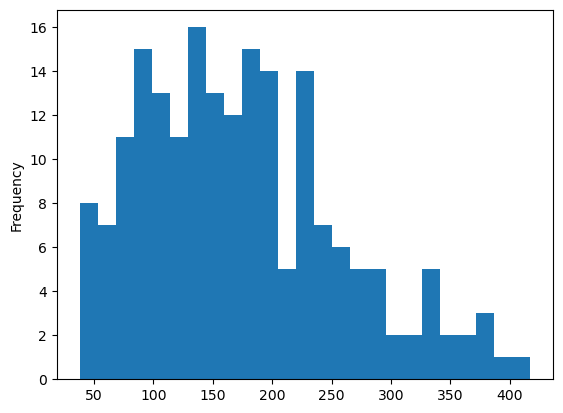

In [16]:
# histogram with 25 bins
health_index['Health_Index'].plot.hist(bins=25)

Since the 50th percentile is at 165.95, it makes sense that the histogram is right-skewed. 

In [18]:
# bring in maps to map on the poverty index
health_tracts=gpd.read_file('data/SF2010_Neighborhoods_CTs.geojson')
health_tracts.head()

shape_area             nhood tractce10        geoid      shape_len  \
0  3326589.16121      Hayes Valley    016400  06075016400  7589.67939621   
1  3970258.84056  Western Addition    016100  06075016100   8525.8087554   
2   3179072.0728  Western Addition    015900  06075015900  8000.96661904   
3  3364564.73418         Japantown    015500  06075015500  12144.0167608   
4   2515362.5151   Pacific Heights    015300  06075015300  6918.26802571   

                                            geometry  
0  MULTIPOLYGON (((-122.43247 37.77376, -122.4341...  
1  MULTIPOLYGON (((-122.42354 37.77967, -122.4234...  
2  MULTIPOLYGON (((-122.42469 37.78534, -122.4244...  
3  MULTIPOLYGON (((-122.42469 37.78534, -122.4249...  
4  MULTIPOLYGON (((-122.43492 37.78588, -122.4365...

<AxesSubplot: >

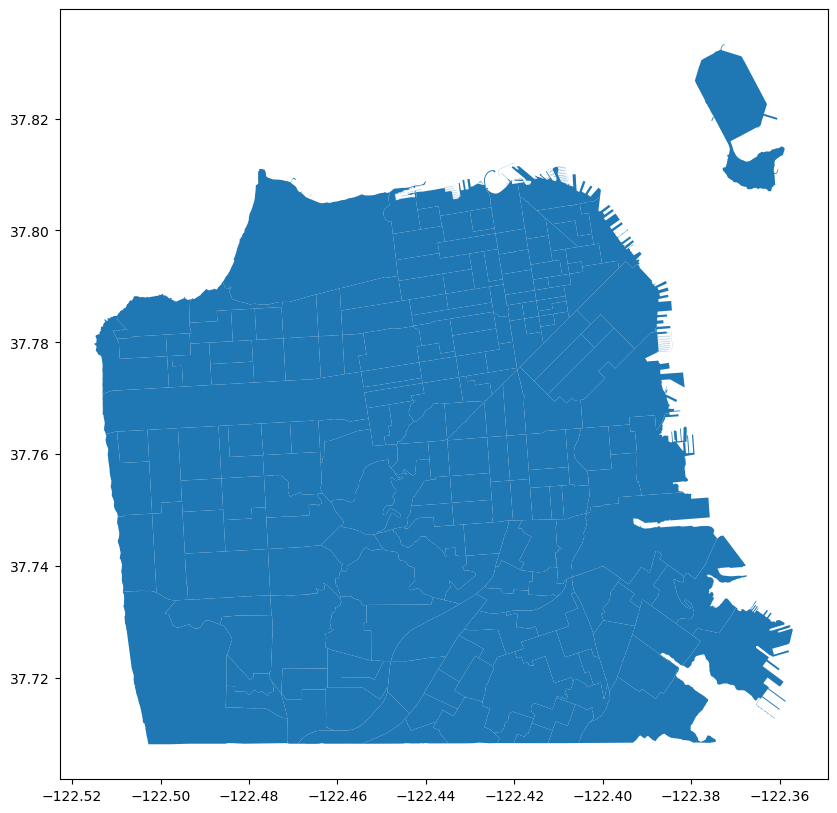

In [19]:
# plot it
health_tracts.plot(figsize=(12,10))

In [22]:
# create a FIPS column before merging
health_tracts['FIPS']=health_tracts['geoid']

In [23]:
health_tracts.head()

shape_area             nhood tractce10        geoid      shape_len  \
0  3326589.16121      Hayes Valley    016400  06075016400  7589.67939621   
1  3970258.84056  Western Addition    016100  06075016100   8525.8087554   
2   3179072.0728  Western Addition    015900  06075015900  8000.96661904   
3  3364564.73418         Japantown    015500  06075015500  12144.0167608   
4   2515362.5151   Pacific Heights    015300  06075015300  6918.26802571   

                                            geometry         FIPS  
0  MULTIPOLYGON (((-122.43247 37.77376, -122.4341...  06075016400  
1  MULTIPOLYGON (((-122.42354 37.77967, -122.4234...  06075016100  
2  MULTIPOLYGON (((-122.42469 37.78534, -122.4244...  06075015900  
3  MULTIPOLYGON (((-122.42469 37.78534, -122.4249...  06075015500  
4  MULTIPOLYGON (((-122.43492 37.78588, -122.4365...  06075015300

In [25]:
# create a new dataframe based on the join, tracts is spatial data so it must come first
health_map=health_tracts.merge(health_index,on="FIPS")
health_map.head(3)

shape_area             nhood tractce10        geoid      shape_len  \
0  3326589.16121      Hayes Valley    016400  06075016400  7589.67939621   
1  3970258.84056  Western Addition    016100  06075016100   8525.8087554   
2   3179072.0728  Western Addition    015900  06075015900  8000.96661904   

                                            geometry         FIPS  \
0  MULTIPOLYGON (((-122.43247 37.77376, -122.4341...  06075016400   
1  MULTIPOLYGON (((-122.42354 37.77967, -122.4234...  06075016100   
2  MULTIPOLYGON (((-122.42469 37.78534, -122.4244...  06075015900   

   Health_Index  
0        115.71  
1        195.24  
2        144.55

<AxesSubplot: >

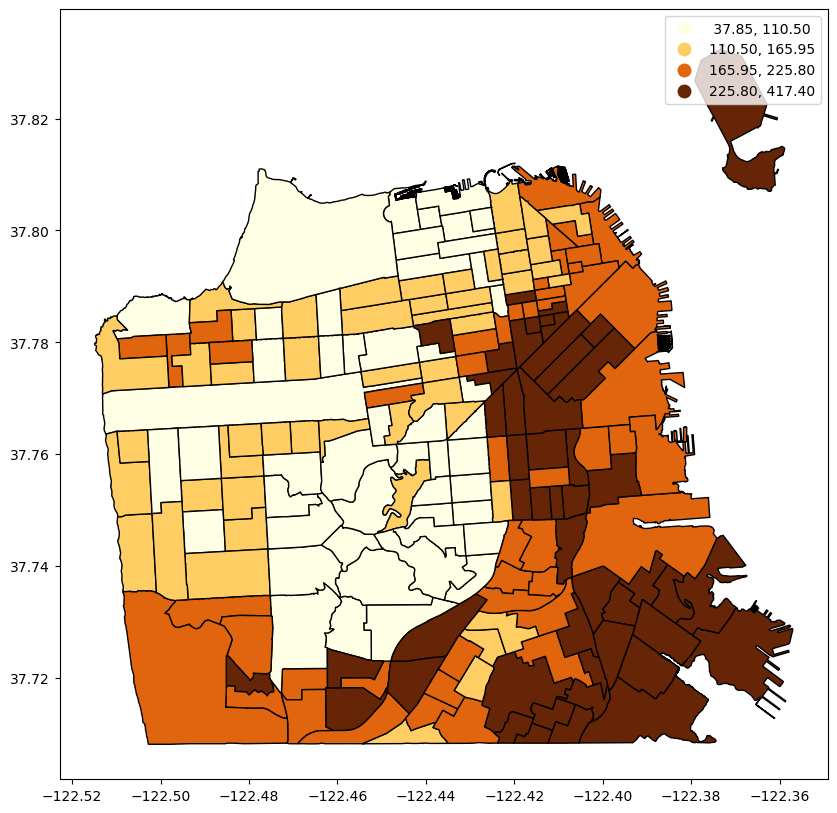

In [26]:
#generate a chloropleth map based on the merged dataset
health_map.plot(figsize=(12,10),
                 column='Health_Index',
                 legend=True,
                 scheme='quantiles',
                 k=4,
                 cmap='YlOrBr',
                 edgecolor='k'
               )

The darker areas indicate a higher vulnerability to environmental and health hazards. With this in mind, we are able to see that the southeastern region of the above map is largely crimson red and it also corresponds to the area known as Bayview Hunters Point (BVHP). Since we only inserted FIPS codes up to this point, we will now move onto bringing in neighborhood names to confirm that this area is indeed BVHP. 

## Including Neighborhood Data

In [28]:
# continue cleaning up data!
columns_to_keep=['nhood',
                 'Health_Index',
                 'geometry']

In [31]:
nhoods=health_map[columns_to_keep]
nhoods.head()

nhood  Health_Index  \
0      Hayes Valley        115.71   
1  Western Addition        195.24   
2  Western Addition        144.55   
3         Japantown        116.66   
4   Pacific Heights        133.75   

                                            geometry  
0  MULTIPOLYGON (((-122.43247 37.77376, -122.4341...  
1  MULTIPOLYGON (((-122.42354 37.77967, -122.4234...  
2  MULTIPOLYGON (((-122.42469 37.78534, -122.4244...  
3  MULTIPOLYGON (((-122.42469 37.78534, -122.4249...  
4  MULTIPOLYGON (((-122.43492 37.78588, -122.4365...

In [34]:
# rename columns
nhoods.columns = ['Neighborhood',
                   'Health Index', 
                  'geometry']
nhoods.sample()

Neighborhood  Health Index  \
6  Pacific Heights        131.78   

                                            geometry  
6  MULTIPOLYGON (((-122.43549 37.78870, -122.4371...

In [35]:
# we can now pull data based on neighborhood, so we will start with pulling in bayview hunters point. 
nhoods.loc[nhoods['Neighborhood'] == 'Bayview Hunters Point']

Neighborhood  Health Index  \
16   Bayview Hunters Point        367.46   
20   Bayview Hunters Point        205.21   
25   Bayview Hunters Point        330.53   
65   Bayview Hunters Point        417.40   
66   Bayview Hunters Point        292.91   
138  Bayview Hunters Point        345.16   
160  Bayview Hunters Point        376.49   
189  Bayview Hunters Point        360.59   
190  Bayview Hunters Point        372.19   
191  Bayview Hunters Point        326.64   
192  Bayview Hunters Point        388.36   

                                              geometry  
16   MULTIPOLYGON (((-122.36519 37.73373, -122.3665...  
20   MULTIPOLYGON (((-122.37412 37.74497, -122.3761...  
25   MULTIPOLYGON (((-122.38528 37.74024, -122.3858...  
65   MULTIPOLYGON (((-122.37072 37.74337, -122.3690...  
66   MULTIPOLYGON (((-122.38282 37.72187, -122.3828...  
138  MULTIPOLYGON (((-122.39152 37.73243, -122.3916...  
160  MULTIPOLYGON (((-122.38903 37.73292, -122.3871...  
189  MULTIPOLYGON (((-122.39594 37.73778, -122.3962...  
190  MULTIPOLYGON (((-122.38452 37.72286, -122.3845...  
191  MULTIPOLYGON (((-122.39262 37.72928, -122.3927...  
192  MULTIPOLYGON (((-122.38156 37.73812, -122.3817...

Already, we can see how high Bayview Hunter Point ranks in the Health Index--far higher than the fourth quantile (225.80) mark!
Let's continue mapping to see if this data matches the geography of the neighborhood map.

In [36]:
# create an interactive map of the neighborhoods with their health index
nhoods.explore()

Though this map shows us the neighborhoods with their health indices, an even better map will be color coded to be more visually compelling. Let's do that!

In [41]:
# let's create a color-coded map, showing the neighborhoods falling into their respective quantiles
# hovering over a neighborhood also displays its health index value - as well as the corresponding tract and neighborhood
nhoods.explore(
     column="Health Index", 
     popup=True, 
     tiles="cartodbpositron", 
    scheme='quantiles', # splitting into quantiles allows us to separate out the different health vulnerability rankings of the neighborhoods
                 k=4,
     cmap="YlOrRd", 
     style_kwds=dict(color="white") # use black outline
)

Unfortunately, as suspected, Bayview Hunters Point and its surrounding neighborhoods show up as the most highly vulnerable neighborhoods in San Francisco. The Health Index is useful to place an operational value to each neighborhood to make them comparable with one another, and mapping these indices with their neighborhoods presents visually compelling data. We can even see that Bayview Hunters Point is right by the ports where the historic industrial violations were taking place.  
This information will be placed with the land use, historic redlining, and COVID maps to paint an even more comprehensive model of the environmental and health crises occurring in disinvested communities. 